In [54]:
import os, sys, csv, re, importlib, json, ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
sys.path.insert(0, "../")
from helpers.parsers import split_path
from helpers.parsers import parse_score
from helpers.parsers import parse_metrics

fontsize = 15

In [55]:
'''
This function queries dataframe with a dictionary with columns' value
'''
def query_df_dict(df, value_dict):
    indices = []
    for key, value in value_dict.items():
        # import pdb; pdb.set_trace();  
        key = key.lower()
        if key in df.columns:
            
            # Core codeline: Filter the df with values in the dict one by one
            df = df.loc[df[key] == value]

    return df.index.tolist()

In [56]:
'''
This function queries dataframe with a single value
'''
def query_df_single(df, value):
    indices = []   

    target = df.columns[0]
    # Core codeline: Filter the df with values in the dict one by one
    # import pdb; pdb.set_trace();
    df = df.loc[df[target] == value]

    return df.index.tolist()

In [57]:
'''
This function removes columns that have same values in all rows.
'''
def remove_column_same_value(df):
    unique_count = df.apply(pd.Series.nunique)
    df = df.drop(unique_count[unique_count == 1].index, axis = 1)
    return df

In [58]:
'''
This function parses score from log.
metric_pattern = ['Metric mse', 'Accuracy Score']

'''

def parse_log_score(model, folder_path, metric_pattern):
    df = pd.read_csv('../results/spreadsheets/{0}_parameter_mapping.csv'.format(model))
    file_names = os.listdir(folder_path)
    count = 1

    # Remove columns that have all same values
    df = remove_column_same_value(df)

    for file_name in file_names:
        if file_name.startswith('log'):
            with open(folder_path + file_name, "r") as f:
                line = f.readline()
                indices = []
                while line:
   
                    if line.startswith('{'):  
                        parameter_dict = ast.literal_eval(line)

                        # query the df with all values in dict
                        indices = query_df_dict(df, parameter_dict)

                    elif line.startswith("['pizero'"):
                        # import pdb; pdb.set_trace();
                        parameter_list = line.rstrip('\n')

                        # query the df with all values in dict
                        indices = query_df_single(df, parameter_list)

                    elif line.startswith(metric_pattern) and indices:
                        score = parse_score(line, pattern = metric_pattern)
                        for index in indices:
                            df.loc[index, str(count)] = score

                    line = f.readline()

            count = count + 1
            # import pdb; pdb.set_trace();       
    df.to_csv("../results/spreadsheets/{0}_{1}.csv".format(model, metric_pattern), index = False)

In [ ]:
model = 'prophet'
folder_path = '../cloudwatch/prophet/'
parse_log_score(model, folder_path, "Metric mse")

In [ ]:
model = 'multi_regression'
folder_path = '../cloudwatch/multi_regression/'
parse_log_score(model, folder_path, "The MSE of prediction is")

In [14]:
model = 'neural_network_123'
folder_path = '../cloudwatch/neural_network_123/'
parse_log_score(model, folder_path, "Accuracy Score")

In [46]:
model = 'neural_network_456'
folder_path = '../cloudwatch/neural_network_456/'
parse_log_score(model, folder_path, "Accuracy Score")

In [17]:
model = 'xgboost_123'
folder_path = '../cloudwatch/xgboost_123/'
parse_log_score(model, folder_path, "Mean Absolute Error")
parse_log_score(model, folder_path, "Accuracy Score")

In [63]:
model = 'xgboost_456'
folder_path = '../cloudwatch/xgboost_456/'
parse_log_score(model, folder_path, "Mean Absolute Error")
parse_log_score(model, folder_path, "Accuracy Score")

In [56]:
model = 'svc_123'
folder_path = '../cloudwatch/svc_123/'
parse_log_score(model, folder_path, "Accuracy Score")

In [57]:
model = 'svc_456'
folder_path = '../cloudwatch/svc_456/'
parse_log_score(model, folder_path, "Accuracy Score")

In [59]:
'''
This function parses metrics from log.
metric_pattern = ['Duration','Billed Duration','Memory Size', 'Max Memory Used']
'''

def parse_log_metric(model, folder_path, metric_pattern):
    df = pd.read_csv('../results/spreadsheets/{0}_parameter_mapping.csv'.format(model))
    file_names = os.listdir(folder_path)
    count = 1

    # Remove columns that have all same values
    df = remove_column_same_value(df)

    for file_name in file_names:
        if file_name.startswith('log'):
            with open(folder_path + file_name, "r") as f:
                line = f.readline()
                indices = []
                while line:
                    if line.startswith('{'):
                        parameter_dict = ast.literal_eval(line)
                        # import pdb; pdb.set_trace();
                        # query the df with all values in dict
                        indices = query_df_dict(df, parameter_dict)

                    elif line.startswith("['pizero"):
                        parameter_list = line.rstrip('\n')

                        # query the df with all values in dict
                        indices = query_df_single(df, parameter_list)

                    elif line.startswith('REPORT') and indices:
                        # import pdb; pdb.set_trace();
                        metrics = parse_metrics(line)
                        for index in indices:
                            df.loc[index, str(count)] = metrics[metric_pattern]

                    line = f.readline()

            count = count + 1
            # import pdb; pdb.set_trace();       
    df.to_csv("../results/spreadsheets/{0}_{1}.csv".format(model, metric_pattern), index = False)

In [20]:
parse_log_metric('multi_regression', '../cloudwatch/multi_regression/', 'Max Memory Used')
parse_log_metric('multi_regression', '../cloudwatch/multi_regression/', 'Billed Duration')

KeyboardInterrupt: 

In [42]:
parse_log_metric('neural_network_123', '../cloudwatch/neural_network_123/', 'Max Memory Used')
parse_log_metric('neural_network_123', '../cloudwatch/neural_network_123/', 'Billed Duration')

In [47]:
parse_log_metric('neural_network_456', '../cloudwatch/neural_network_456/', 'Max Memory Used')
parse_log_metric('neural_network_456', '../cloudwatch/neural_network_456/', 'Billed Duration')

In [61]:
parse_log_metric('svc_123', '../cloudwatch/svc_123/', 'Max Memory Used')
parse_log_metric('svc_123', '../cloudwatch/svc_123/', 'Billed Duration')

In [ ]:
parse_log_metric('svc_456', '../cloudwatch/svc_456/', 'Max Memory Used')
parse_log_metric('svc_456', '../cloudwatch/svc_456/', 'Billed Duration')

In [18]:
parse_log_metric('xgboost_123', '../cloudwatch/xgboost_123/', 'Max Memory Used')
parse_log_metric('xgboost_123', '../cloudwatch/xgboost_123/', 'Billed Duration')

In [64]:
parse_log_metric('xgboost_456', '../cloudwatch/xgboost_456/', 'Max Memory Used')
parse_log_metric('xgboost_456', '../cloudwatch/xgboost_456/', 'Billed Duration')

In [20]:
'''
This function parses execution time from nohup.out.
'''

def parse_log_execution_time(model, file_path):
    count = 1
    time_list = []
    with open(file_path, "r") as f:
        line = f.readline()
        execution_times = {}
        while line:
            if line.startswith('===Async Tasks end==='):
                # Read in the next line to "===Async Tasks end==="
                temp = f.readline()
                execution_times[count] = float(temp)
                count = count + 1
            line = f.readline()
    for _, value in execution_times.items():
        time_list.append(value)
    print ("{0} Average execution time: {1}".format(model, np.mean(time_list) ))
    print ("{0} Standard Deviation: {1}".format(model, np.std(time_list)))
    with open("../results/spreadsheets/{0}_execution_times.csv".format(model), "w") as f:
        w = csv.DictWriter(f, execution_times.keys())
        w.writeheader()
        w.writerow(execution_times)


In [28]:
parse_log_execution_time('prophet', '../cloudwatch/Prophet/prophet.out')

prophet Average execution time: 801.5021634737651
prophet Standard Deviation: 40.280187849163056


In [21]:
parse_log_execution_time('multi_regression', '../cloudwatch/multi_regression/multi_regression.out')

multi_regression Average execution time: 158.71304442882538
multi_regression Standard Deviation: 1.4489027501686442


In [30]:
parse_log_execution_time('neural_network_123', '../cloudwatch/neural_network_123/neural_network_123.out')
parse_log_execution_time('neural_network_456', '../cloudwatch/neural_network_456/neural_network_456.out')

neural_network_123 Average execution time: 116.0994033018748
neural_network_123 Standard Deviation: 6.047172172717303
neural_network_456 Average execution time: 121.29448047478994
neural_network_456 Standard Deviation: 2.813545224862883


In [24]:
parse_log_execution_time('svc_123', '../cloudwatch/svc_123/svc_123.out')
parse_log_execution_time('svc_456', '../cloudwatch/svc_456/svc_456.out')

svc_123 Average execution time: 116.72995609442393
svc_123 Standard Deviation: 1.1087518387511146
svc_456 Average execution time: 115.32966309388479
svc_456 Standard Deviation: 3.958806988092333


In [29]:
parse_log_execution_time('xgboost_123', '../cloudwatch/xgboost_123/xgboost_123.out')
parse_log_execution_time('xgboost_456', '../cloudwatch/xgboost_456/xgboost_456.out')

xgboost_123 Average execution time: 1244.4246651093165
xgboost_123 Standard Deviation: 32.57679446620693
xgboost_456 Average execution time: 1280.5638622840245
xgboost_456 Standard Deviation: 38.4678747685896


In [91]:
def parse_memory_per_execution(file_path):
    with open(file_path, 'r') as f:
        memory_size_list = []
        max_memory_used_list = []
        billed_duration_list = []
        line = f.readline()
        while line:
            if line.startswith('REPORT'):
                memory_size = re.search(r'(?<=Memory\sSize:\s)(.*?)(?=\sMB)', line).group(0)
                billed_duration = re.search(r'(?<=Billed\sDuration:\s)(.*?)(?=\sms)', line).group(0)
                max_memory_used = re.search(r'(?<=Max\sMemory\sUsed:\s)(.*?)(?=\sMB)', line).group(0)
                memory_size_list.append(int(memory_size))
                billed_duration_list.append(int(billed_duration))
                max_memory_used_list.append(int(max_memory_used))
            line = f.readline()
            
        print ("Average max memory used : {0}".format(np.mean(max_memory_used_list)))
        print ("Standard Deviation of max memory used : {0}".format(np.std(max_memory_used_list)))
        
        print ("Average billed duration : {0}".format(np.mean(billed_duration_list)))
        print ("Standard Deviation of billed duration : {0}".format(np.std(billed_duration_list)))
        
        print ("Total cost : {0}".format(memory_size_list[0]/1024 * sum(billed_duration_list)/1000 * 0.00001667))
        print (len(billed_duration_list))
        print (memory_size_list[0])
#         df = pd.DataFrame({'memory_size':memory_size_list, 'billed_duration':billed_duration_list, 
#                            'max_memory_used':max_memory_used_list})
#         fig = plt.figure(figsize=[15, 10])
#         ax = fig.add_subplot(211)

#         # ax.scatter(df.index, df['max_memory_used'])
#         ax.plot(df['max_memory_used'])
#         ax.set_title('Max Memory Used (MB)')
#         ax.set_ylabel('Max Memory Used (MB)', fontsize=fontsize)
#         # ax.set_xlabel("Allocated Memory (MB)", fontsize=fontsize)
        
#         ax = fig.add_subplot(212)
#         # ax.scatter(df.index, df['billed_duration'])
#         ax.plot(df['billed_duration'])
#         ax.set_title('Billed Duration (ms)')
#         ax.set_ylabel('Billed Duration (ms)', fontsize=fontsize)
#         # ax.set_xlabel("Allocated Memory (MB)", fontsize=fontsize)


In [45]:
def parse_memory_all_executions(folder_path):

    file_names = os.listdir(folder_path)
    memory_size_list = []
    max_memory_used_list = []
    billed_duration_list = []
    for file_name in file_names:
        if file_name.startswith('log'):
            with open(folder_path + file_name, 'r') as f:
                line = f.readline()
                while line:
                    if line.startswith('REPORT'):
                        memory_size = re.search(r'(?<=Memory\sSize:\s)(.*?)(?=\sMB)', line).group(0)
                        billed_duration = re.search(r'(?<=Billed\sDuration:\s)(.*?)(?=\sms)', line).group(0)
                        max_memory_used = re.search(r'(?<=Max\sMemory\sUsed:\s)(.*?)(?=\sMB)', line).group(0)
                        memory_size_list.append(int(memory_size))
                        billed_duration_list.append(int(billed_duration))
                        max_memory_used_list.append(int(max_memory_used))
                    line = f.readline()

    print ("Average max memory used : {0}".format(np.mean(max_memory_used_list)))
    print ("Standard Deviation of max memory used : {0}".format(np.std(max_memory_used_list)))

    print ("Average billed duration : {0}".format(np.mean(billed_duration_list)))
    print ("Standard Deviation of billed duration : {0}".format(np.std(billed_duration_list)))

In [110]:
parse_memory_per_execution("/Users/michaelzhang/Downloads/Seneca/cloudwatch/Opt_Memory/20_Test/XGBoost_log_768.txt")
parse_memory_per_execution("/Users/michaelzhang/Downloads/Seneca/cloudwatch/Max_Memory/XGBoost_log_max.txt")


Average max memory used : 229.28255208333334
Standard Deviation of max memory used : 13.875266804769458
Average billed duration : 24846.614583333332
Standard Deviation of billed duration : 42007.78869990208
Total cost : 0.39762534250000003
768
1280
Average max memory used : 224.30208333333334
Standard Deviation of max memory used : 17.845616753880737
Average billed duration : 15934.114583333334
Standard Deviation of billed duration : 26371.599953583984
Total cost : 0.5992425328750001
768
3008


In [77]:
parse_memory_per_execution("/Users/michaelzhang/Downloads/Seneca/cloudwatch/Max_Memory/Prophet_log_max.txt")

Average max memory used : 326.7604166666667
Standard Deviation of max memory used : 16.818420451786057
Average billed duration : 11784.635416666666
Standard Deviation of billed duration : 5074.7997058582505
Total cost : 0.22159545606250003
384


In [78]:
parse_memory_per_execution("/Users/michaelzhang/Downloads/Seneca/cloudwatch/Opt_Memory/Prophet_log_384.txt")

Average max memory used : 319.1640625
Standard Deviation of max memory used : 19.663620707525535
Average billed duration : 17125.520833333332
Standard Deviation of billed duration : 7425.131504137326
Total cost : 0.32202418362500007
384


In [76]:
parse_memory_per_execution("/Users/michaelzhang/Downloads/Seneca/cloudwatch/Max_Memory/Multi_regression_log_max.txt")

Average max memory used : 315.7450980392157
Standard Deviation of max memory used : 16.5112476663695
Average billed duration : 9625.882352941177
Standard Deviation of billed duration : 2732.1105656656564
Total cost : 0.12019715962500001
255


In [46]:
parse_memory_all_executions("/Users/michaelzhang/Downloads/Seneca/cloudwatch/Prophet/")

Average max memory used : 311.3787326388889
Standard Deviation of max memory used : 20.882077537512515
Average billed duration : 20704.461805555555
Standard Deviation of billed duration : 9563.756047969278


In [47]:
parse_memory_all_executions("/Users/michaelzhang/Downloads/Seneca/cloudwatch/multi_regression/")

Average max memory used : 362.8683660130719
Standard Deviation of max memory used : 19.056175794009096
Average billed duration : 6073.686274509804
Standard Deviation of billed duration : 2269.7923387511555


In [48]:
parse_memory_all_executions("/Users/michaelzhang/Downloads/Seneca/cloudwatch/xgboost_123/")
parse_memory_all_executions("/Users/michaelzhang/Downloads/Seneca/cloudwatch/xgboost_456/")

Average max memory used : 228.74328566445763
Standard Deviation of max memory used : 15.921037695911307
Average billed duration : 15663.794907568887
Standard Deviation of billed duration : 26092.578459195098
Average max memory used : 225.10287351332582
Standard Deviation of max memory used : 19.6730703835134
Average billed duration : 16130.497439013803
Standard Deviation of billed duration : 26811.074748410025


In [49]:
parse_memory_all_executions("/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_123/")
parse_memory_all_executions("/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_456/")

Average max memory used : 224.4357421875
Standard Deviation of max memory used : 19.644623577886804
Average billed duration : 2194.1536458333335
Standard Deviation of billed duration : 1526.389714236273
Average max memory used : 228.54993489583333
Standard Deviation of max memory used : 16.200115137384408
Average billed duration : 2153.9453125
Standard Deviation of billed duration : 1504.545649554247


In [50]:
parse_memory_all_executions("/Users/michaelzhang/Downloads/Seneca/cloudwatch/neural_network_123/")
parse_memory_all_executions("/Users/michaelzhang/Downloads/Seneca/cloudwatch/neural_network_456/")

Average max memory used : 328.8386574074074
Standard Deviation of max memory used : 16.4005317227838
Average billed duration : 2601.8595679012346
Standard Deviation of billed duration : 776.4982125581398
Average max memory used : 327.5689814814815
Standard Deviation of max memory used : 16.435616837054578
Average billed duration : 2719.6604938271603
Standard Deviation of billed duration : 914.5299383794654


Average max memory used : 293.0442708333333
Standard Deviation of max memory used : 4.515669303656175
Average billed duration : 28229.947916666668
Standard Deviation of billed duration : 8634.25916030364


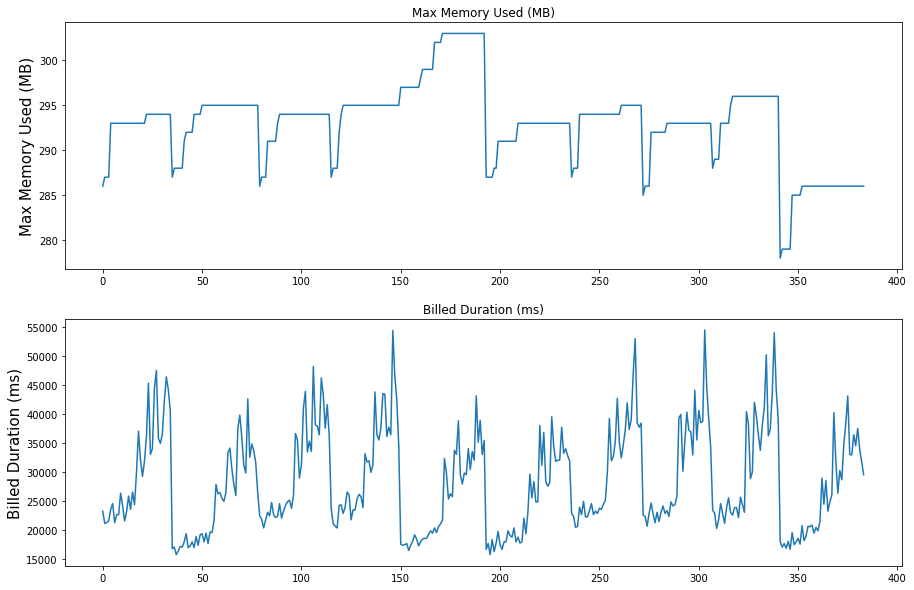

In [35]:
parse_memory_per_execution("/Users/michaelzhang/Downloads/Seneca/cloudwatch/Prophet/log_1549494805.txt")

Average max memory used : 222.52567975830814
Standard Deviation of max memory used : 17.040340595759805
Average billed duration : 15728.09667673716
Standard Deviation of billed duration : 26401.291892593144


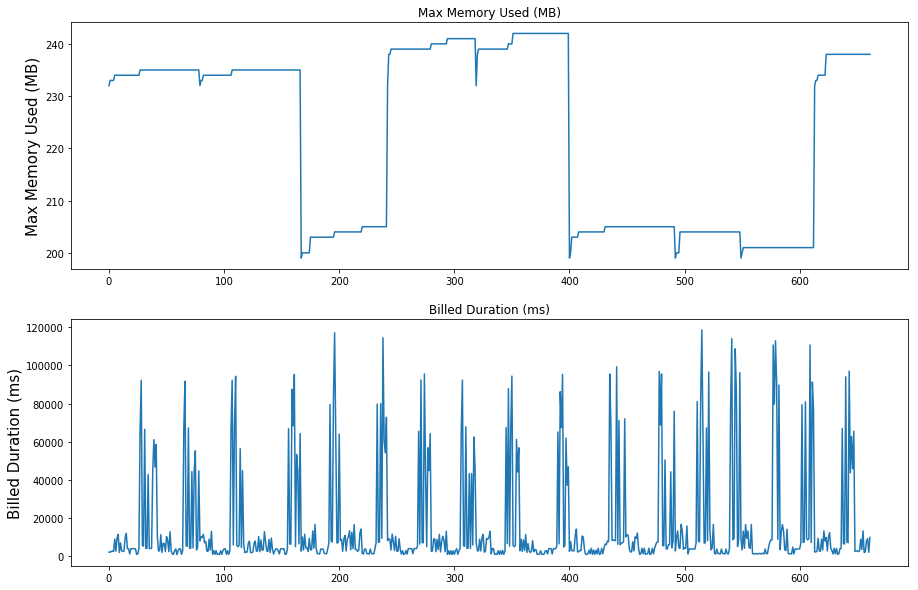

In [51]:
parse_memory_per_execution("/Users/michaelzhang/Downloads/Seneca/cloudwatch/xgboost_123/log_1549815621.txt")

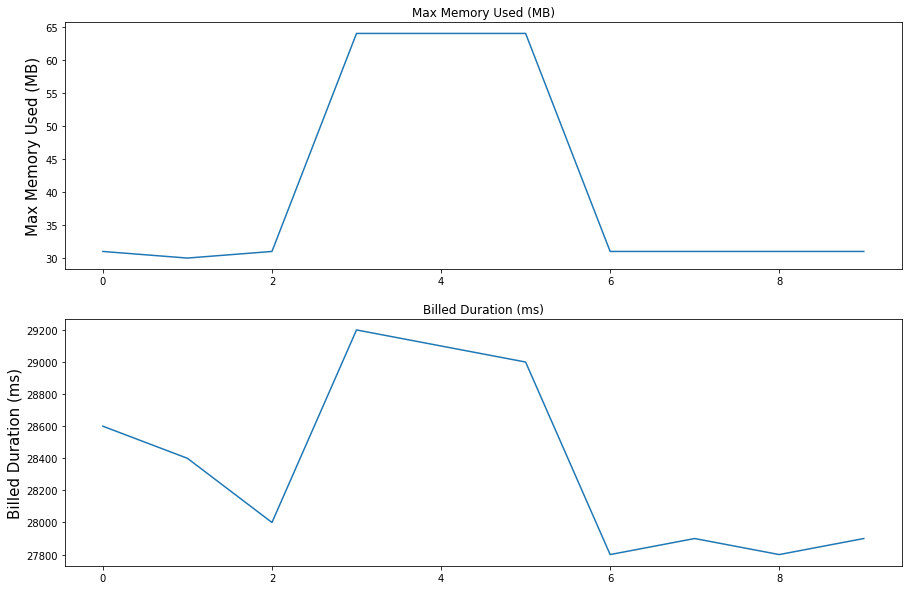

In [61]:
parse_memory('/Users/michaelzhang/Downloads/Seneca/cloudwatch/matrix_multiplication_128.txt')

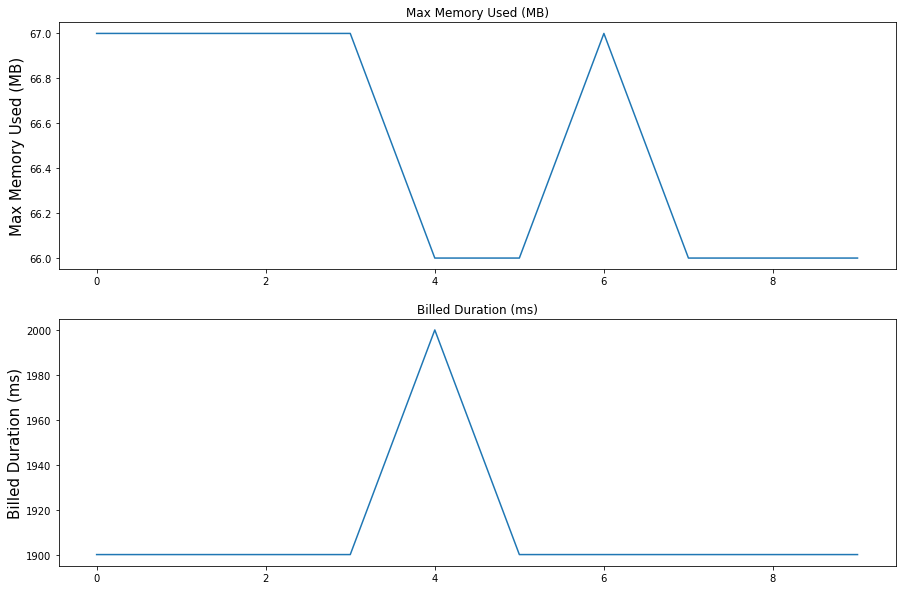

In [62]:
parse_memory('/Users/michaelzhang/Downloads/Seneca/cloudwatch/matrix_multiplication_3008.txt')

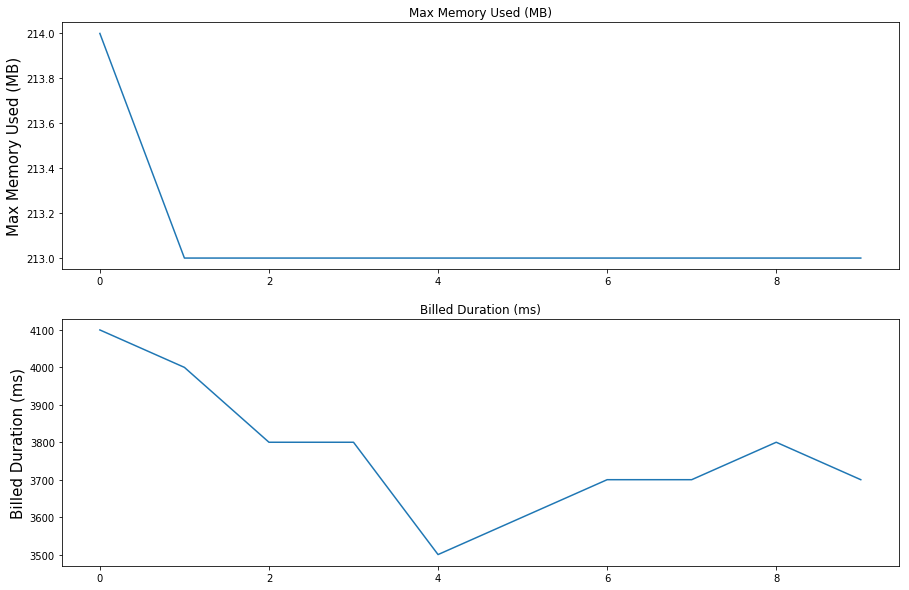

In [63]:
parse_memory('/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_256.txt')

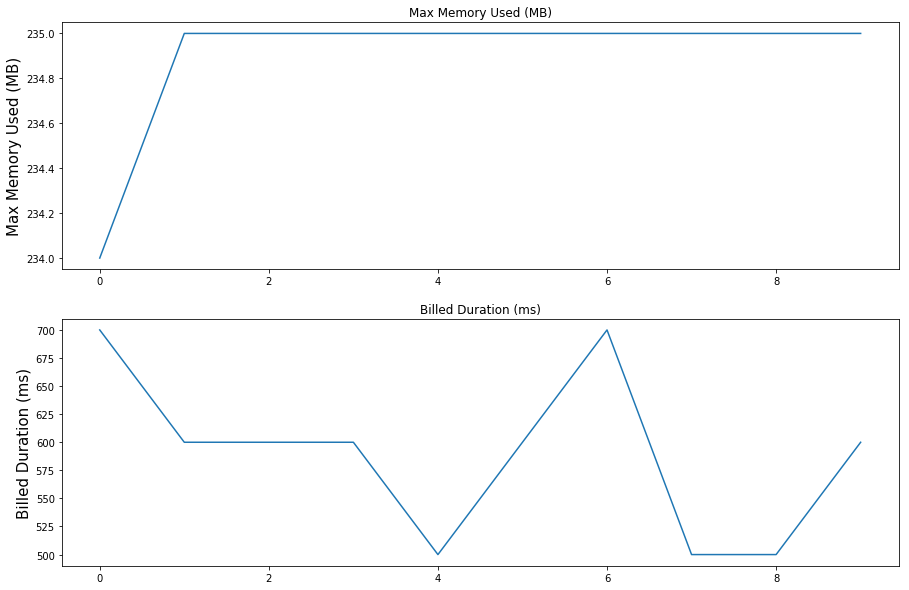

In [64]:
parse_memory('/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_3008.txt')

In [65]:
def parse_memory_step(file_path):
    with open(file_path, 'r') as f:
        memory_size_list = []
        max_memory_used_list = []
        billed_duration_list = []
        line = f.readline()
        while line:
            if line.startswith('REPORT'):
                memory_size = re.search(r'(?<=Memory\sSize:\s)(.*?)(?=\sMB)', line).group(0)
                billed_duration = re.search(r'(?<=Billed\sDuration:\s)(.*?)(?=\sms)', line).group(0)
                max_memory_used = re.search(r'(?<=Max\sMemory\sUsed:\s)(.*?)(?=\sMB)', line).group(0)
                memory_size_list.append(int(memory_size))
                billed_duration_list.append(int(billed_duration))
                max_memory_used_list.append(int(max_memory_used))
            line = f.readline()
        df = pd.DataFrame({'memory_size':memory_size_list, 'billed_duration':billed_duration_list, 
                           'max_memory_used':max_memory_used_list})
        fig = plt.figure(figsize=[15, 15])
        ax = fig.add_subplot(211)
        ax.plot(df['memory_size'], df['max_memory_used'])
        ax.set_title('Max Memory Used (MB)')
        ax.set_ylabel('Max Memory Used (MB)', fontsize=fontsize)
        ax.set_xlabel("Allocated Memory (MB)", fontsize=fontsize)
        ax = fig.add_subplot(212)
        ax.plot(df['memory_size'], df['billed_duration'])
        ax.set_title('Billed Duration (ms)')
        ax.set_ylabel('Billed Duration (ms)', fontsize=fontsize)
        ax.set_xlabel("Allocated Memory (MB)", fontsize=fontsize)


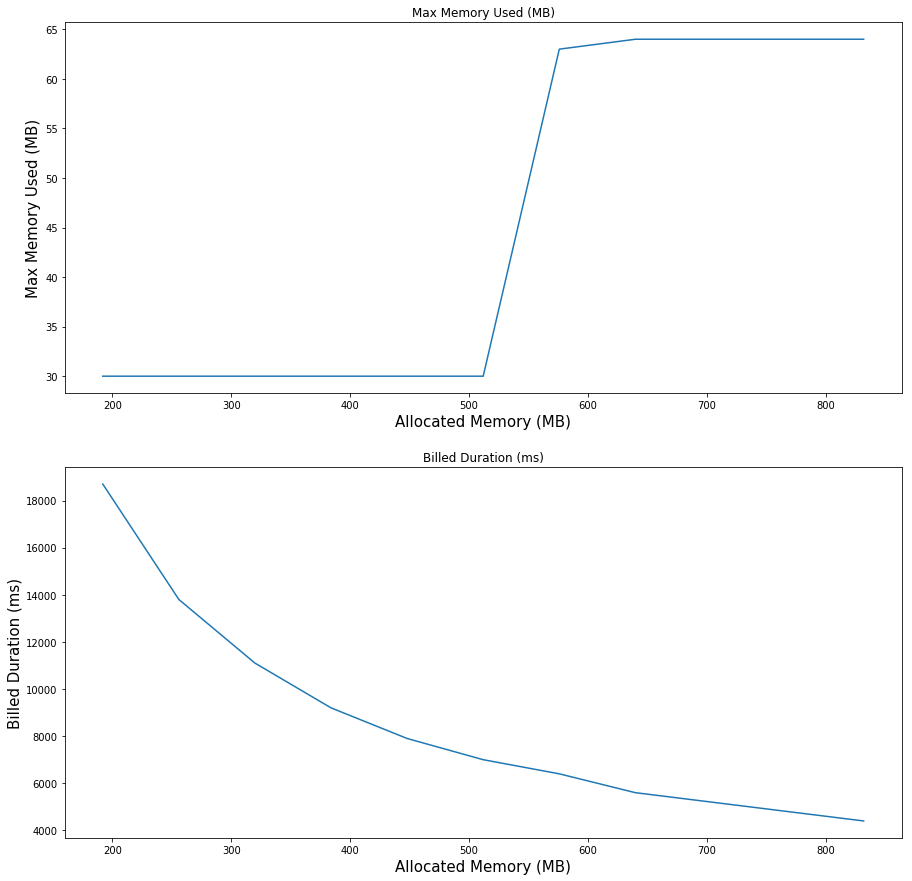

In [66]:
parse_memory_step('/Users/michaelzhang/Downloads/Seneca/cloudwatch/matrix_multiplication_steps.txt')

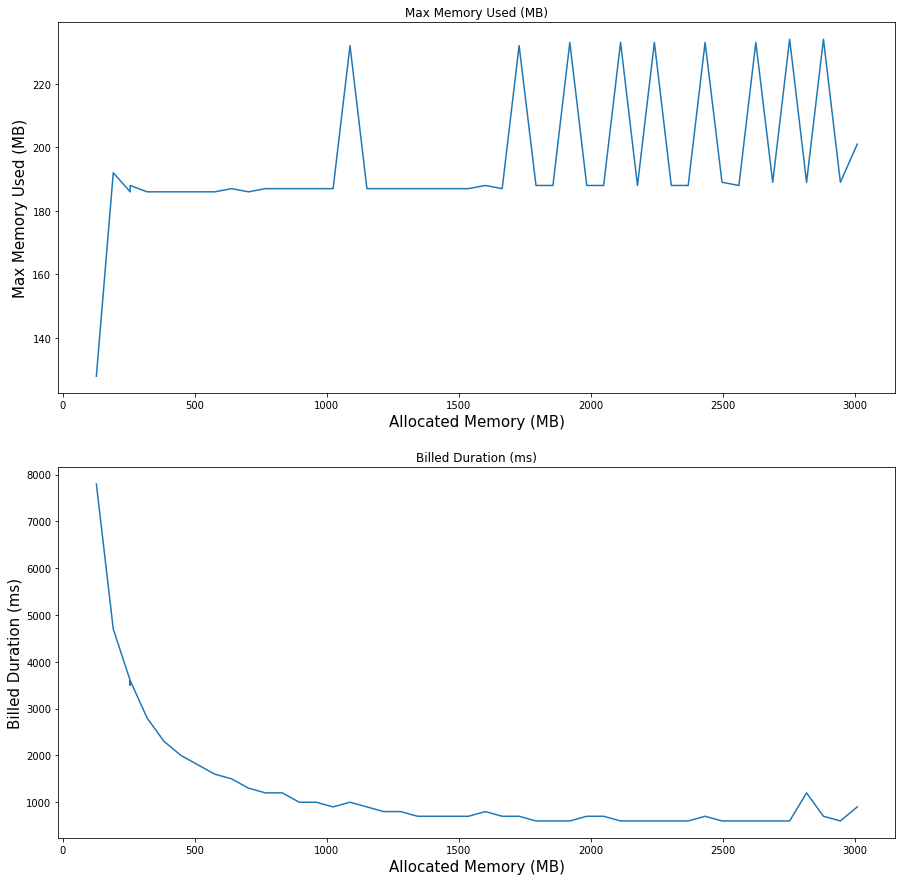

In [23]:
parse_memory_step('/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_step.txt')

In [30]:
def parse_memory_duration(model, index):
    df_memory = pd.read_csv('/Users/michaelzhang/Downloads/Seneca/results/spreadsheets/{0}_Max Memory Used.csv'.format(model))
    df_duration = pd.read_csv('/Users/michaelzhang/Downloads/Seneca/results/spreadsheets/{0}_Billed Duration.csv'.format(model))
    cols = [str(x) for x in list(range(1, 31))]
    df_memory = df_memory[cols]
    df_duration = df_duration[cols]
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(211)
    ax.set_title('Max Memory Used (MB)')
    ax.set_ylabel('Max Memory Used (MB)', fontsize=fontsize)
    ax.set_xlabel("Trials)", fontsize=fontsize)
    ax.plot(df_memory.loc[index])
    ax = fig.add_subplot(212)
    ax.set_title('Billed Duration (ms)')
    ax.set_ylabel('Billed Duration (ms)', fontsize=fontsize)
    ax.set_xlabel("Trials", fontsize=fontsize)
    ax.plot(df_duration.loc[index])

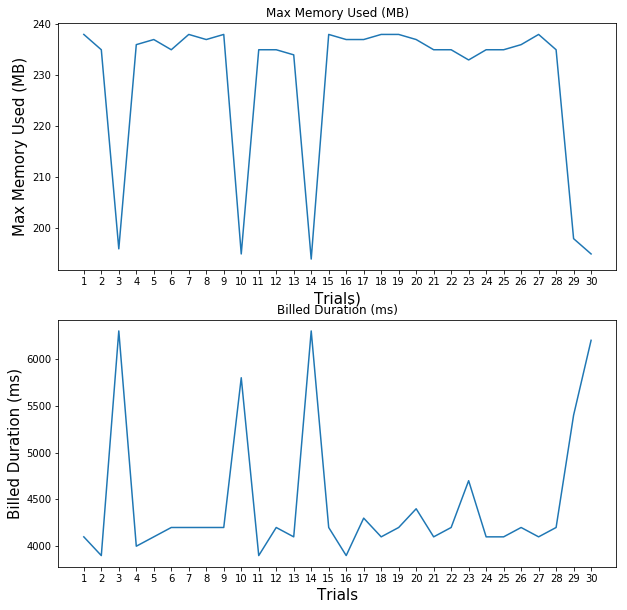

In [36]:
parse_memory_duration('svc_456', 2)

# Average and Stdev for 5 applications

In [35]:
data = {"Name": ["AAAA", "BBBB"],
        "C1": [25, 25],
        "C2": [2, 1],
        "C3": [1, 10]}
df = pd.DataFrame(data)
df

,Name,C1,C2,C3
0,AAAA,25,2,1
1,BBBB,25,1,10
